Kendra Robbins

In [1]:
import numpy as np
import math
import scipy.optimize as opt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercise 1

F,G,H,L,M, and N are given in section 1.4. Expressions for P and Q are given in the notes as well. 

From exercise 1 on the first DSGE homework we determined that $A = \alpha \beta$.

In [2]:
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02
A = α * β #derived in previous homework
Kbar = A**(1/(1-α)) #this equation was given

In [11]:
F = α*K**(α-1) / (K**α - K)
G = - (α*K**(α-1)*(α+K**(α-1))) / (K**α - K)
H = (α**2*K**(2*(α-1))) / (K**α - K)
L = - (α*K**(2*α-1)) / (K**α - K)
M = α**2 * K**(2*(α-1)) / (K**α - K)
N = ρ
P = (- G - math.sqrt(G**2 - 4*F*H))/(2*F)
Q = - (L*N+M)/(F*N+F*P+G)

In [12]:
print('F:', F, '\nG:', G, '\nH:', H,'\nL:', L,
      '\nM:', M, '\nN:', N,'\nP:', P, '\nQ:', Q, '\nKbar:', Kbar)

F: 2.763343017362853 
G: -9.023563692703393 
H: 2.8197377728192374 
L: -1.5531326685925513 
M: 2.8197377728192374 
N: 0.95 
P: 0.35 
Q: 0.24750650674493596 
Kbar: 0.1927826194504225


In [13]:
sizek = 30
sizez = 30

kbargrid = np.linspace(.5*Kbar, 1.5*Kbar, sizek)
zgrid = np.linspace(-1,1, sizez)
K_t, z_t = np.meshgrid(kbargrid, zgrid)

In [14]:
def Kprime(K_t,z_t): #inputs are K_t and z_t
    
    Kprime = Kbar +P*(K_t-Kbar)+Q*z_t
    return Kprime 

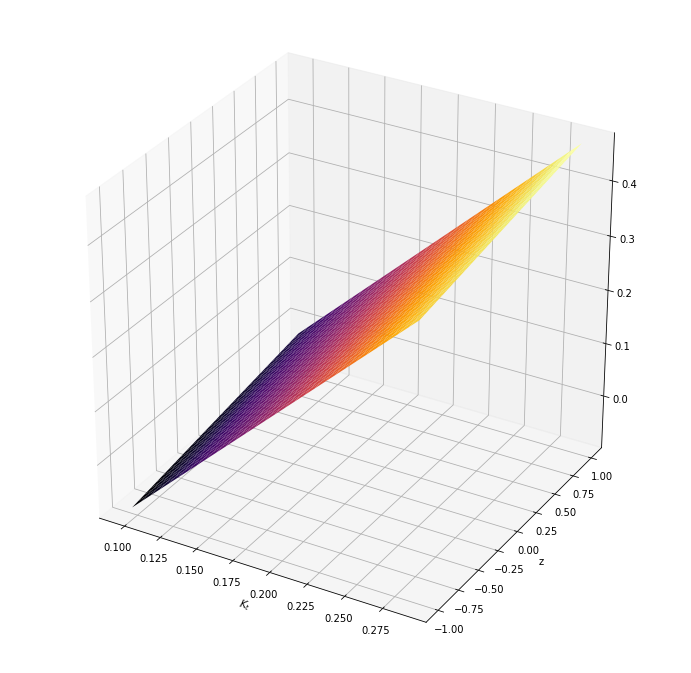

In [28]:
y = Kprime(K_t,z_t)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K_t, z_t, y.T, cmap='inferno')
ax.set(xlabel='$K_t$', ylabel='z')
plt.show()

## Exercise 3

$ 0 = E_t \Big\{ F P \tilde{X}_t + F Q \tilde{Z}_{t+1} + G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + L N \tilde{Z}_t + L \varepsilon_{t+1} + M \tilde{Z}_t \Big\}$

$= E_t \Big\{ F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + F Q \varepsilon_{t+1}G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + L\varepsilon_{t+1} + M \tilde{Z}_t \Big\} $

$= E_t \Big\{ F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + F Q \varepsilon_{t+1}+ 
    G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + L\varepsilon_{t+1} + M\tilde{Z}_t \Big\}$
    
$= F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t +
    G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + M\tilde{Z}_t $
    
$= (F P^2 + GP + H) \tilde{X}_{t-1} + (F P Q + F Q N + G Q + LN + M) \tilde{Z}_t $

$= ((F P + G)P + H) \tilde{X}_{t-1} + ((FQ + L)N + (FP + G)Q + M) \tilde{Z}_t $
 

## Exercise 4

I used code from the Baseline Tax Model jupyter notebook.

In [7]:
from collections import namedtuple

In [8]:
γ=2.5
ξ=1.5
β=.98
α=.40
a=.5
δ=.10
zbar=0
ρ_z = .9
τ=.05

In [9]:
#setting up a named tuple 
params = ["a", "alpha", "beta", "delta", "gamma", "rho", "sigma", "tau", "xi"]
BaselineModel = namedtuple("BaselineModel", params)
m = BaselineModel(0.50, 0.40, 0.98, 0.10, 2.50, 0.90, 0.02, 0.05, 1.5)


In [10]:
#utility function
def u(m, c, l):
    uc = (c**(1.0 - m.gamma) - 1.0) / (1.0 - m.gamma)
    ul = m.a * ((1.0 - l)**(1.0 - m.xi) - 1.0) / (1.0 - m.xi)
    return uc + ul

#marginal utility with respect to c
def du_dc(m, c, l):
    return c**(-m.gamma)

#marginal utility with respect to l
def du_dl(m, c, l):
    return - m.a * (1.0 - l)**(-m.xi)

#production function
def f(m, k, l, z):
    return k**m.alpha * (l * np.exp(z))**(1.0 - m.alpha)

#derivative of production function with respect to k
def df_dk(m, k, l, z):
    return m.alpha * (l/k * np.exp(z))**(1.0 - m.alpha)

#derivative of production function with respect to l 
def df_dl(m, k, l, z):
    return (1.0 - m.alpha) * np.exp(z)**(1.0 - m.alpha) * (k / l)**m.alpha

In [11]:
#get w, r, T, c
def Definitions(m, ktp1, kt, lt, zt):
    wt = df_dl(m, kt, lt, zt)
    rt = df_dk(m, kt, lt, zt)
    Tt = m.tau * (wt*lt + (rt - m.delta)*kt)
    ct = (1 - m.tau) * (wt*lt + (rt - m.delta)*kt) + kt + Tt - ktp1

    ct = max(ct, 1e-8)

    return ct, rt, Tt, wt

#get characteristic equations 
def CharacteristicEquations(m, ktp2, ltp1, ktp1, lt, kt, ltm1, ztp1, zt):
    ct, rt, Tt, wt = Definitions(m, ktp1, kt, lt, zt)
    ctp1, rtp1, Ttp1, wtp1 = Definitions(m, ktp2, ktp1, ltp1, ztp1)
    rr_tp1 = (rtp1 - m.delta)*(1 - m.tau) + 1.0

    intertemporal_ee = du_dc(m, ct, lt) - m.beta*du_dc(m, ctp1, ltp1)*rr_tp1
    intratemporal_ee = du_dl(m, ct, lt) + du_dc(m, ct, lt)*wt*(1.0 - m.tau)

    return np.array([intertemporal_ee, intratemporal_ee])

In [12]:
#solve for steady state
def solve_ss(m):
    solve_me = lambda x: CharacteristicEquations(m, x[0], x[1], x[0], x[1], x[0], x[1], 0.0, 0.0)
    sol = opt.root(solve_me, np.array([0.5, 0.85]))

    return sol.x



In [13]:
#get kbar, lbar
kbar, lbar = solve_ss(m)

#get other steady state variables 
cbar, rbar, Tbar, wbar= Definitions(m, kbar, kbar, lbar, 0.0)
ybar = kbar**α * lbar**(1 - α)
ibar = δ*kbar



In [14]:
print('Kbar:', kbar, '\nLbar:', lbar, "\ncbar:", cbar, '\nrbar:', rbar, '\nTbar:',Tbar,'\nwbar:',wbar, '\nybar:',ybar, '\nibar:',ibar)

Kbar: 4.225229026815977 
Lbar: 0.5797914531671479 
cbar: 0.8607032061550788 
rbar: 0.12148227712083877 
Tbar: 0.04303516030775391 
wbar: 1.3279527683552124 
ybar: 1.2832261088366759 
ibar: 0.4225229026815977


## Exercise 5

I used code from my #6 from the first DSGE homework.

In [15]:
def solve_ss(params, γ, ξ, β, α, a, δ, z, τ):
    k, l = params
    w = (1 - α) * k**α * (l * np.exp(z))**(-α)  # SS wage
    r = α * k**(α - 1) * (l * np.exp(z))**(1 - α)  # SS interest rate
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + T
    eq1 = β * ((r - δ) * (1 - τ) + 1) - 1
    eq2 = c**(-γ) * w * (1 - τ) - a * (1 - l)**(-ξ)
    return eq1, eq2

In [16]:
def return_ss(params_vec):
    
    γ, ξ, β, α, a, δ, z, τ = params_vec
    
    ss = opt.root(solve_ss, 0.2 * np.ones(2), args=(γ, ξ, β, α, a, δ, z, τ))
    k_bar, l_bar, = ss.x
    y_bar = k_bar**α * l_bar**(1 - α) * np.exp(z)
    i_bar = δ * k_bar
    w_bar = (1 - α) * k_bar**α * (l_bar * np.exp(z))**(-α)
    r_bar = α * k_bar**(α - 1) * (l_bar * np.exp(z))**(1 - α)
    T_bar = τ * (w_bar * l_bar + (r_bar - δ) * k_bar)
    c_bar = (1 - τ) * (w_bar * l_bar + (r_bar - δ) * k_bar) + T_bar
    
    return np.array([k_bar, l_bar, y_bar, i_bar, 
                     w_bar, r_bar, T_bar, c_bar])

In [17]:
ɛ = 1e-6
params = np.array([γ, ξ, β, α, a, δ, zbar, τ])
dmat = np.zeros((len(params), len(params)))
ss = return_ss(params)

for i in range(len(params)):
    params_temp = params.copy()
    params_temp[i] += ɛ
    dmat[:, i] = (return_ss(params_temp) - ss) / ɛ

In [18]:
dmat

array([[ 1.38699360e-01, -8.01655538e-01,  6.54312500e+01,
         2.59849888e+01, -1.84925285e+00, -4.83493866e+01,
         3.98145871e+00, -2.32322662e+00],
       [ 1.90324935e-02, -1.10004220e-01,  2.60160458e-01,
        -7.69382874e-01, -2.53756898e-01,  1.31976859e+00,
        -3.34507353e-02, -1.38923774e-01],
       [ 4.21237667e-02, -2.43467349e-01,  8.29418323e+00,
         4.68371197e+00, -5.61628623e-01, -4.12103220e+00,
         1.72248271e+00, -4.66715085e-01],
       [ 1.38699360e-02, -8.01655539e-02,  6.54312500e+00,
         2.59849888e+00, -1.84925285e-01, -6.09757977e-01,
         3.98145871e-01, -2.32322662e-01],
       [ 1.33226763e-08, -1.55431223e-09,  7.98740139e+00,
         4.39589765e+00,  3.55271368e-09, -7.28744799e+00,
        -2.66453526e-09, -1.64791776e-01],
       [-1.77635684e-09,  1.94289029e-10, -1.09603342e+00,
        -7.46624984e-09, -4.57966998e-10,  1.00000000e+00,
         3.74700271e-10,  2.26129466e-02],
       [ 1.41269154e-03, -8.165089

## Exercise 6

Using Baseline Tax Model code and LinApp code.

In [28]:
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

In [45]:
def derivative(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)


def linearize(m, kbar, lbar, eps=1e-6):
    # Compute ss gamma
    x = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
    Gamma_ss = CharacteristicEquations(m, kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0)

    # Allocate space for derivative matrix
    neq = len(Gamma_ss)
    Dmat = np.empty((neq, 8))

    CEsplat = lambda x: CharacteristicEquations(m, *list(x))
    for i in range(8):
        xtilde = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
        xtilde[i] += eps
        Dmat[:, i] = derivative(CEsplat, x, xtilde)

    F = Dmat[:, :2]
    G = Dmat[:, 2:4]
    H = Dmat[:, 4:6]
    L = Dmat[:, 6]
    M = Dmat[:, 7]
    N = m.rho
    
    return F, G, H, L, M, H

In [49]:
#To compute P and Q I borrow Matt and Tim's code, modifying Kerk's LinApp code:

AA=np.zeros((0,2))
BB=np.zeros((0,2))
CC=np.zeros((0,0))
DD=np.zeros((0,1))
FF=F
GG=G
HH=H
JJ=np.zeros((2,0))
KK=np.zeros((2,0))
LL = np.zeros((2,1))
LL[0,0] =L[0]
LL[1,0] = L[1]
MM = np.zeros((2,1))
MM[0,0] =M[0]
MM[1,0] = M[1]
WW=np.zeros((0,0)) #empty list or floating point
TT=np.array([1e-8, 1e-8])
NN= m.rho
Zbar=np.array([0])
Sylv = 0

PP, QQ, UU, RR, SS, VV = LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)
print ('RR:',RR)
print ('SS', SS)

PP: [[ 0.91529275  0.        ]
 [-0.02633543  0.        ]]
QQ [[ 0.54504859]
 [-0.00655467]]
RR: []
SS []


In [50]:
P = PP
Q = QQ
N = NN

In [51]:
F, G, H, L, M, H= linearize(m,kbar,lbar)

In [52]:
F,G,H,L,M, H, P, Q,N

(array([[-4.22623769,  5.44191867],
        [-0.        , -0.        ]]), array([[  8.5666152 ,  -5.61221554],
        [  5.33163184, -14.89888287]]), array([[-4.31700912, -0.        ],
        [-5.27237248, -0.        ]]), array([ 3.1551835, -0.       ]), array([-3.25392039, -3.00365571]), array([[-4.31700912, -0.        ],
        [-5.27237248, -0.        ]]), array([[ 0.91529275,  0.        ],
        [-0.02633543,  0.        ]]), array([[ 0.54504859],
        [-0.00655467]]), 0.9)

## Exercise 7

In [53]:
σ_z = .0004

In [177]:
X_0 = np.zeros((2,1))
Z_0= 0 

#nextXZ uses the equations derived in the text to determine the next period's k,l,z
def nextXZ(Xt_1,Zt_1): #inputs are in absolute deviation from steady state
    Z_t = N*Zt_1+ np.random.normal(0, m.sigma)
    X_t = P@Xt_1 + Q*Z_t
    return X_t, Z_t

#onetimeseries is a function that generates a time series with a specified number of periods
def onetimeseries(periods=250):
    X=X_0 #initial values of deviations from steady state are set to 0
    Z=Z_0
    
    #Xmat is a matrix whose first row is values of k and second row is values of l in absolute deviation from the steady state
    Xmat = np.empty((periods,2))
    Zvec = np.empty(periods)

    for i in range(periods):
        X_t, Z_t = nextXZ(X,Z)
        Xmat[i,:]=X_t.T
        Zvec[i]=Z_t
        X = X_t
        Z = Z_t 
   
    kvec = Xmat[:,0]
    lvec = Xmat[:,1]
        
    yvec = np.empty(periods) 
    ivec = np.empty(periods)
    cvec = np.empty(periods)
    rvec = np.empty(periods)
    wvec = np.empty(periods)
    Tvec = np.empty(periods)
    
    yvec[i] = kvec[i]**m.alpha * lvec[i]**(1 - m.alpha) * np.exp(Zvec[i])
    ivec[i] = m.delta * kvec[i]
    wvec[i] = (1 - m.alpha) * kvec[i]**m.alpha * (lvec[i] * np.exp(Zvec[i]))**(-m.alpha)
    rvec[i] = m.alpha * kvec[i]**(m.alpha - 1) * (lvec[i] * np.exp(Zvec[i]))**(1 - m.alpha)
    Tvec[i] = m.tau * (wvec[i] * lvec[i] + (rvec[i] - m.delta) * kvec[i])
    cvec[i] = (1 - m.tau) * (wvec[i] * lvec[i] + (rvec[i] - m.delta) * kvec[i]) + Tvec[i]
        
    return lvec, cvec, ivec, yvec, kvec
    

In [178]:
lvec, cvec, ivec, yvec, kvec = onetimeseries()
np.shape(lvec)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


(250,)

In [183]:
#the function simtimeseries simulates a specified number of time series, each with a specified number of periods.
def simtimeseries(numseries=10000, numperiods=250):
    
    lmat = np.empty((numperiods, numseries))
    cmat = np.empty((numperiods, numseries))
    imat = np.empty((numperiods, numseries))
    ymat = np.empty((numperiods, numseries))
    kmat = np.empty((numperiods, numseries))

    for i in range(numseries):
        lvec, cvec, ivec, yvec, kvec= onetimeseries(numperiods)
        lmat[:,i]=lvec
        cmat[:,i]=cvec
        imat[:,i]=ivec
        ymat[:,i]=yvec
        kmat[:,i]=kvec
        
    #initialize vectors that will hold average value for each period
    lavg = np.empty(numperiods)
    cavg = np.empty(numperiods)
    iavg = np.empty(numperiods)
    yavg = np.empty(numperiods)
    kavg = np.empty(numperiods)
    
    #initialize vectors that will hold 5th percentile values
    l5pct = np.empty(numperiods)
    c5pct = np.empty(numperiods)
    i5pct = np.empty(numperiods)
    y5pct = np.empty(numperiods)
    k5pct = np.empty(numperiods)
    
    #initialize vectors that will hold 95th percentile values
    l95pct = np.empty(numperiods)
    c95pct = np.empty(numperiods)
    i95pct = np.empty(numperiods)
    y95pct = np.empty(numperiods)
    k95pct = np.empty(numperiods)
    
    #find average, 95th percentile, and 5th percentile values for each period
    for i in range(numperiods): 
        lavg[i] = np.mean(lmat[i,:])
        cavg[i] = np.mean(cmat[i,:])
        iavg[i] = np.mean(imat[i,:])
        yavg[i] = np.mean(ymat[i,:])
        kavg[i] = np.mean(kmat[i,:])
        
        l95pct[i] = np.percentile(lmat[i,:], 95)
        c95pct[i] = np.percentile(cmat[i,:], 95)
        i95pct[i] = np.percentile(imat[i,:], 95)
        y95pct[i] = np.percentile(ymat[i,:], 95)
        k95pct[i] = np.percentile(kmat[i,:], 95)
        
        l5pct[i] = np.percentile(lmat[i,:], 5)
        c5pct[i] = np.percentile(cmat[i,:], 5)
        i5pct[i] = np.percentile(imat[i,:], 5)
        y5pct[i] = np.percentile(ymat[i,:], 5)
        k5pct[i] = np.percentile(kmat[i,:], 5)
        
    return lavg, cavg, iavg, yavg, kavg, l5pct, c5pct, i5pct, y5pct, k5pct, l95pct, c95pct, i95pct, y95pct, k95pct
        
        
        
        

In [185]:
def TSgraphs(numseries=10000, numperiods=250):
    
    lavg, cavg, iavg, yavg, kavg, l5pct, c5pct, i5pct, y5pct, k5pct, l95pct, c95pct, i95pct, y95pct, k95pct=simtimeseries(numseries,numperiods)
    
    D =np.linspace(0,numperiods, numperiods)
    
    plt.plot(D, lavg, label ='average')
    plt.plot(D, l5pct, label = '5th percentile')
    plt.plot(D, l95pct, label = '95th percentile')
    plt.title("labor")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    
    plt.plot(D, kavg, label ='average')
    plt.plot(D, k5pct, label = '5th percentile')
    plt.plot(D, k95pct, label = '95th percentile')
    plt.title("capital")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    
    plt.plot(D, cavg, label ='average')
    plt.plot(D, c5pct, label = '5th percentile')
    plt.plot(D, c95pct, label = '95th percentile')
    plt.title("consumption")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    
    plt.plot(D, iavg, label ='average')
    plt.plot(D, i5pct, label = '5th percentile')
    plt.plot(D, i95pct, label = '95th percentile')
    plt.title("investment")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    
    plt.plot(D, yavg, label ='average')
    plt.plot(D, y5pct, label = '5th percentile')
    plt.plot(D, y95pct, label = '95th percentile')
    plt.title("GDP")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


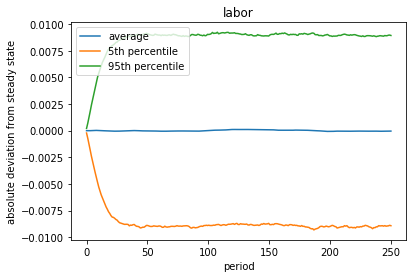

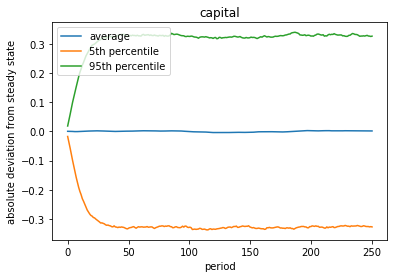

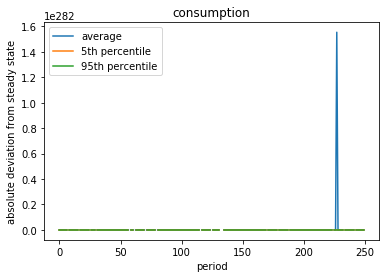

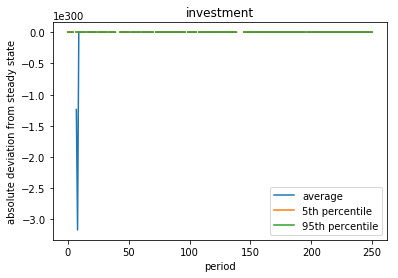

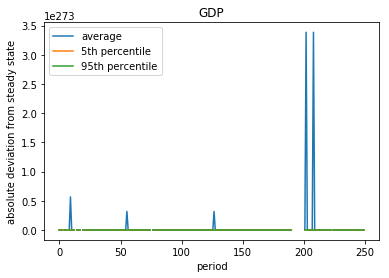

In [186]:
TSgraphs(10000,250)

## Exercise 8

In [196]:
#here I modify my simtimeseries function to return matrices instead of vectors:

def TSmats(numseries=10000, numperiods=250):
    
    lmat = np.zeros((numperiods, numseries))
    cmat = np.zeros((numperiods, numseries))
    imat = np.zeros((numperiods, numseries))
    ymat = np.zeros((numperiods, numseries))
    kmat = np.zeros((numperiods, numseries))

    for i in range(numseries):
        lvec, cvec, ivec, yvec, kvec= onetimeseries(numperiods)
        lmat[:,i]=lvec
        cmat[:,i]=cvec
        imat[:,i]=ivec
        ymat[:,i]=yvec
        kmat[:,i]=kvec
        
    return lmat, cmat, imat, ymat, kmat

In [199]:
lmat, cmat, imat, ymat, kmat = TSmats(10,20)

#mean and standard deviation
lmean = np.mean(lmat, axis =1)
cmean = np.mean(cmat, axis =1)
imean = np.mean(imat, axis =1)
ymean = np.mean(ymat, axis =1)
kmean = np.mean(kmat, axis =1)
print("Average Mean and Average Standard Deviation \n", \
      "  GDP: \t", ymean.mean(), "\t", ymean.std(), "\n", \
      "  Capital: \t", kmean.mean(), "\t", kmean.std(), "\n", \
      "  Investment: \t", imean.mean(), "\t", imean.std(), "\n", \
      "  Labor: \t", lmean.mean(), "\t", lmean.std(), "\n")


#Volatility
Ystat = np.std(lmat, axis=1)
Kstat = np.std(kmat, axis=1)
Istat = np.std(imat, axis=1)
Lstat = np.std(lmat, axis=1)
print("Average volatility and Standard Deviation \n", \
      "  Output: \t", Ystat.mean(), "\t", Ystat.std(), "\n", \
      "  Capital: \t", Kstat.mean(), "\t", Kstat.std(), "\n", \
      "  Investment: \t", Istat.mean(), "\t", Istat.std(), "\n", \
      "  Labor: \t", Lstat.mean(), "\t", Lstat.std(), "\n")

#Coefficient of Variation
Ystat = np.mean(ymat, axis=1)/np.std(ymat, axis=1)
Kstat = np.mean(kmat, axis=1)/np.std(kmat, axis=1)
Istat = np.mean(imat, axis=1)/np.std(imat, axis=1)
Lstat = np.mean(lmat, axis=1)/np.std(lmat, axis=1)
print("Average coefficient of variation and Standard Deviation \n", \
      "  Output: \t", Ystat.mean(), "\t", Ystat.std(), "\n", \
      "  Capital: \t", Kstat.mean(), "\t", Kstat.std(), "\n", \
      "  Investment: \t", Istat.mean(), "\t", Istat.std(), "\n", \
      "  Labor: \t", Lstat.mean(), "\t", Lstat.std(), "\n")

#Relative Volatility
Ystat = np.std(ymat, axis=1)/np.std(ymat, axis=1)
Kstat = np.std(kmat, axis=1)/np.std(ymat, axis=1)
Istat = np.std(imat, axis=1)/np.std(ymat, axis=1)
Lstat = np.std(lmat, axis=1)/np.std(ymat, axis=1)
print("RELATIVE VOLATILITY: Average value and Standard Deviation \n", \
      "  Output: \t", Ystat.mean(), "\t", Ystat.std(), "\n", \
      "  Capital: \t", Kstat.mean(), "\t", Kstat.std(), "\n", \
      "  Investment: \t", Istat.mean(), "\t", Istat.std(), "\n", \
      "  Labor: \t", Lstat.mean(), "\t", Lstat.std(), "\n")







Average Mean and Average Standard Deviation 
   GDP: 	 nan 	 nan 
   Capital: 	 -0.06687858210982198 	 0.056395462768790816 
   Investment: 	 1.4562347363563493e+255 	 inf 
   Labor: 	 0.00171665998426472 	 0.0015199015311604855 

Average volatility and Standard Deviation 
   Output: 	 0.0024635398329047025 	 0.0015421155057869975 
   Capital: 	 0.09573946036125092 	 0.05692277291739584 
   Investment: 	 inf 	 nan 
   Labor: 	 0.0024635398329047025 	 0.0015421155057869975 

Average coefficient of variation and Standard Deviation 
   Output: 	 nan 	 nan 
   Capital: 	 -0.4905155243206605 	 0.4048814143291567 
   Investment: 	 -0.07264202324723079 	 0.3326558318438435 
   Labor: 	 0.46266480565382057 	 0.421640244244324 

RELATIVE VOLATILITY: Average value and Standard Deviation 
   Output: 	 nan 	 nan 
   Capital: 	 nan 	 nan 
   Investment: 	 nan 	 nan 
   Labor: 	 nan 	 nan 



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


## Exercise 9
I will revise my functions from Exercise 7. 

In [202]:
X_0 = np.zeros((2,1))

#this function is a modification of my onetimeseries() function
def oneTSimp(periods=250, shock = σ_z):
    X=X_0 #initial values of deviations from steady state are set to 0
    
    #Xmat is a matrix whose first row is values of k and second row is values of l in absolute deviation from the steady state
    Xmat = np.empty((periods,2))
    Zvec = np.empty(periods)

    for i in range(periods):
        if i==0:
            Z=shock 
            X_t, Z_t = nextXZ(X,Z)
            Xmat[i,:]=X_t.T
            X = X_t
        else: 
            Z=0
            X_t, Z_t = nextXZ(X,Z)
            Xmat[i,:]=X_t.T
            X = X_t
        
   
    kvec = Xmat[:,0]
    lvec = Xmat[:,1]
        
    yvec = np.empty(periods) 
    ivec = np.empty(periods)
    cvec = np.empty(periods)
    rvec = np.empty(periods)
    wvec = np.empty(periods)
    Tvec = np.empty(periods)
    
    yvec[i] = kvec[i]**m.alpha * lvec[i]**(1 - m.alpha) * np.exp(Zvec[i])
    ivec[i] = m.delta * kvec[i]
    wvec[i] = (1 - m.alpha) * kvec[i]**m.alpha * (lvec[i] * np.exp(Zvec[i]))**(-m.alpha)
    rvec[i] = m.alpha * kvec[i]**(m.alpha - 1) * (lvec[i] * np.exp(Zvec[i]))**(1 - m.alpha)
    Tvec[i] = m.tau * (wvec[i] * lvec[i] + (rvec[i] - m.delta) * kvec[i])
    cvec[i] = (1 - m.tau) * (wvec[i] * lvec[i] + (rvec[i] - m.delta) * kvec[i]) + Tvec[i]
        
    return lvec, cvec, ivec, yvec, kvec

In [203]:
oneTSimp(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


(array([-9.09889097e-05, -2.85980844e-04, -5.18317354e-04, -7.11545254e-04,
        -8.72870318e-04, -1.01146144e-03, -1.06352528e-03, -9.73269537e-04,
        -7.14101150e-04, -4.73250083e-04]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan]),
 array([2.46151512e-312, 2.31297541e-312, 2.35541533e-312, 2.05833592e-312,
        2.22809558e-312, 2.56761491e-312, 2.48273508e-312, 2.05833592e-312,
        2.05833592e-312, 6.45753573e-004]),
 array([ 5.0000000e-01,  0.0000000e+00, -5.0000000e-01,  0.0000000e+00,
        -5.0000000e-01,  4.4408921e-16,  5.0000000e-01,  0.0000000e+00,
        -5.0000000e-01,            nan]),
 array([0.00756611, 0.01413668, 0.02508153, 0.02719883, 0.03791496,
        0.03578052, 0.04283043, 0.02633941, 0.02580807, 0.00645754]))

In [206]:
#my simtimeseries() function modified
def simTSimp(numseries=10000, numperiods=250, shock=σ_z):
    
    lmat = np.empty((numperiods, numseries))
    cmat = np.empty((numperiods, numseries))
    imat = np.empty((numperiods, numseries))
    ymat = np.empty((numperiods, numseries))
    kmat = np.empty((numperiods, numseries))

    for i in range(numseries):
        lvec, cvec, ivec, yvec, kvec= oneTSimp(numperiods, shock)
        lmat[:,i]=lvec
        cmat[:,i]=cvec
        imat[:,i]=ivec
        ymat[:,i]=yvec
        kmat[:,i]=kvec
        
    #initialize vectors that will hold average value for each period
    lavg = np.empty(numperiods)
    cavg = np.empty(numperiods)
    iavg = np.empty(numperiods)
    yavg = np.empty(numperiods)
    kavg = np.empty(numperiods)
    
    #initialize vectors that will hold 5th percentile values
    l5pct = np.empty(numperiods)
    c5pct = np.empty(numperiods)
    i5pct = np.empty(numperiods)
    y5pct = np.empty(numperiods)
    k5pct = np.empty(numperiods)
    
    #initialize vectors that will hold 95th percentile values
    l95pct = np.empty(numperiods)
    c95pct = np.empty(numperiods)
    i95pct = np.empty(numperiods)
    y95pct = np.empty(numperiods)
    k95pct = np.empty(numperiods)
    
    #find average, 95th percentile, and 5th percentile values for each period
    for i in range(numperiods): 
        lavg[i] = np.mean(lmat[i,:])
        cavg[i] = np.mean(cmat[i,:])
        iavg[i] = np.mean(imat[i,:])
        yavg[i] = np.mean(ymat[i,:])
        kavg[i] = np.mean(kmat[i,:])
        
        l95pct[i] = np.percentile(lmat[i,:], 95)
        c95pct[i] = np.percentile(cmat[i,:], 95)
        i95pct[i] = np.percentile(imat[i,:], 95)
        y95pct[i] = np.percentile(ymat[i,:], 95)
        k95pct[i] = np.percentile(kmat[i,:], 95)
        
        l5pct[i] = np.percentile(lmat[i,:], 5)
        c5pct[i] = np.percentile(cmat[i,:], 5)
        i5pct[i] = np.percentile(imat[i,:], 5)
        y5pct[i] = np.percentile(ymat[i,:], 5)
        k5pct[i] = np.percentile(kmat[i,:], 5)
        
    return lavg, cavg, iavg, yavg, kavg, l5pct, c5pct, i5pct, y5pct, k5pct, l95pct, c95pct, i95pct, y95pct, k95pct
        
        

In [207]:
def TSgraphs(numseries=10000, numperiods=250, shock=σ_z):
    
    lavg, cavg, iavg, yavg, kavg, l5pct, c5pct, i5pct, y5pct, k5pct, l95pct, c95pct, i95pct, y95pct, k95pct=simTSimp(numseries,numperiods, shock)
    
    D =np.linspace(0,numperiods, numperiods)
    
    plt.plot(D, lavg, label ='average')
    plt.plot(D, l5pct, label = '5th percentile')
    plt.plot(D, l95pct, label = '95th percentile')
    plt.title("labor")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    
    plt.plot(D, kavg, label ='average')
    plt.plot(D, k5pct, label = '5th percentile')
    plt.plot(D, k95pct, label = '95th percentile')
    plt.title("capital")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    
    plt.plot(D, cavg, label ='average')
    plt.plot(D, c5pct, label = '5th percentile')
    plt.plot(D, c95pct, label = '95th percentile')
    plt.title("consumption")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    
    plt.plot(D, iavg, label ='average')
    plt.plot(D, i5pct, label = '5th percentile')
    plt.plot(D, i95pct, label = '95th percentile')
    plt.title("investment")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    
    plt.plot(D, yavg, label ='average')
    plt.plot(D, y5pct, label = '5th percentile')
    plt.plot(D, y95pct, label = '95th percentile')
    plt.title("GDP")
    plt.xlabel("period")
    plt.ylabel('absolute deviation from steady state')
    plt.legend()
    plt.show()
    



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4406: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


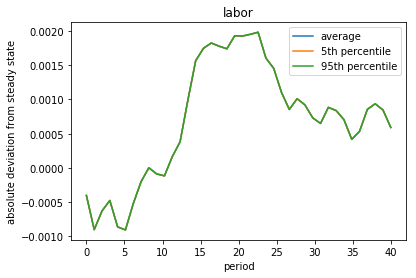

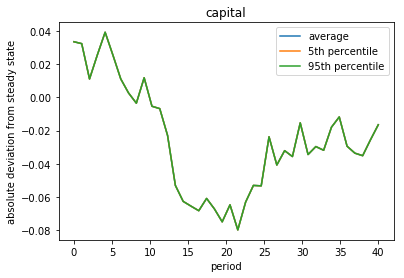

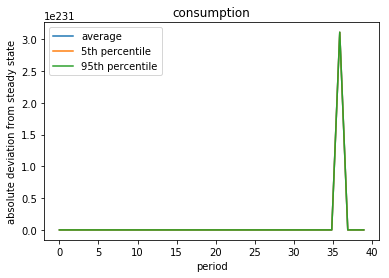

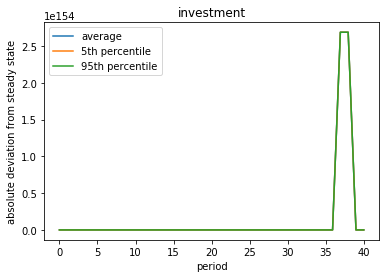

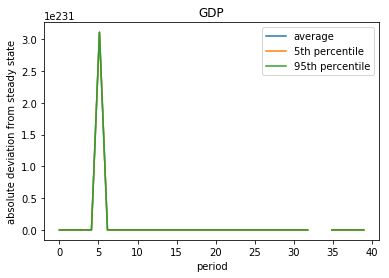

In [214]:
TSgraphs(1,40,.1)

## Exercise 10